In [1]:
from utils.analysis.tools import simDir

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d, uniform_filter1d
from numpy.polynomial.polynomial import Polynomial

In [4]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/01_Flow/20240224_FlowPhaseDiagramHighRes/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.52_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_0.0_kd_1.0")

In [5]:
sim.run()

In [7]:
sim.condensate()

In [8]:
sim.com

array([[ 9.99094666e+00, -2.80236092e-03],
       [ 9.99254904e+00, -7.81696853e-03],
       [ 9.99066915e+00, -3.60180703e-03],
       ...,
       [ 1.79817906e-02, -2.29452987e-03],
       [ 1.79258105e-02, -2.29428043e-03],
       [ 1.65557706e-02, -2.56748263e-03]])

In [93]:
def step(x,x0):
    return np.where(x<x0,0,1)

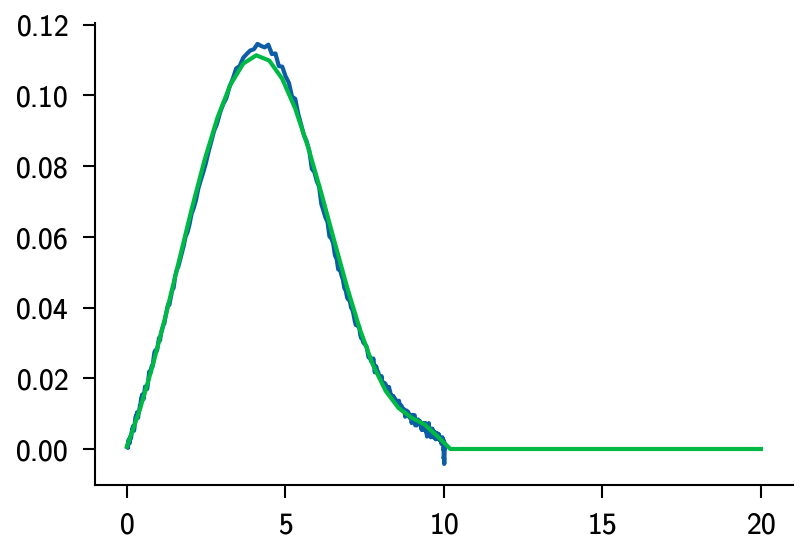

In [111]:
com = uniform_filter1d(sim.com[:,0],10)
x = com[:-1]
y = np.diff(com)
plt.plot(x,-y)
poly = Polynomial.fit(x,-y,6)
polyfunc = lambda x: poly(x) * (1-step(x,10))
x2 = np.linspace(0,20)
plt.plot(x2,polyfunc(x2))

In [110]:
poly.coef

array([ 0.10253668, -0.0955359 , -0.2314139 ,  0.18656456,  0.21186845,
       -0.09165876, -0.08254049])

In [98]:
poly = lambda x: poly(x) * (1-step(x,10))

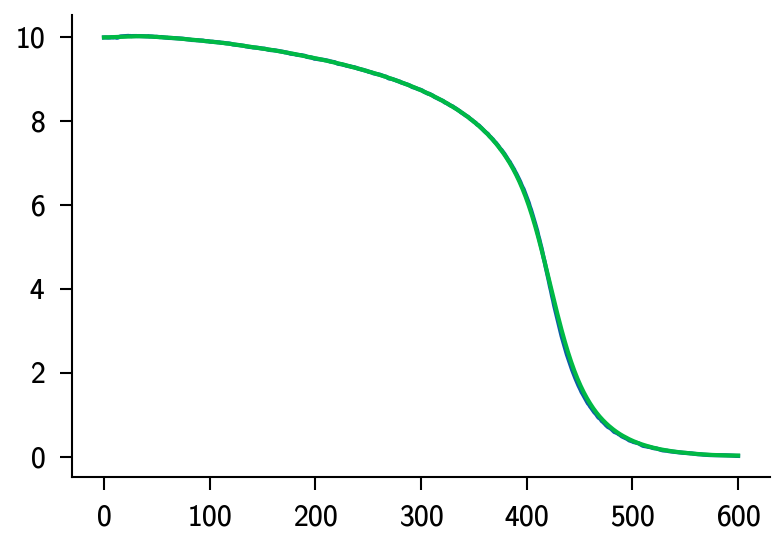

In [84]:
plt.plot(sim.com[:,0])
plt.plot(com)